In [531]:
import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
%matplotlib inline
from datetime import datetime


pd.set_option('display.max_columns', 25)

subscriber = pd.read_csv('subscribers.csv')
subscriber

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,...,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,...,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,...,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,...,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,...,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,...,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,...,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [532]:
tier_spend = pd.read_csv('subid_tier_spend.csv')
tier_spend.head()

,subid,tier
0,21724479,3
1,29417030,7
2,29726122,8
3,24930568,5
4,23452753,7


In [533]:
chan_sp = pd.read_csv('channel_spend_undergraduate.csv')
chan_sp

,tier,spend
0,tier1,"{'bing': 300, 'display': 12, 'facebook': 9000,..."
1,tier2,"{'bing': 400, 'display': 13, 'facebook': 10500..."
2,tier3,"{'bing': 900, 'display': 19, 'facebook': 11000..."
3,tier4,"{'bing': 1000, 'display': 20, 'facebook': 1300..."
4,tier5,"{'bing': 1100, 'display': 29, 'facebook': 1400..."
5,tier6,"{'bing': 1300, 'display': 31, 'facebook': 1600..."
6,tier7,"{'bing': 2100, 'display': 94, 'facebook': 1700..."
7,tier8,"{'bing': 3700, 'display': 148, 'facebook': 230..."


In [534]:
new

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,tier
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,...,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,NaN
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,False,0.1101,ar,NaN,14,False,0,nan,NaN,NaN,True,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,...,False,0.0367,ar,NaN,14,False,0,nan,NaN,NaN,True,7.0
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,...,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,NaN
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,...,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,affiliate,...,False,0.3303,ar,NaN,14,True,1,2020-03-20 02:57:03,2020-07-20 02:57:03,NaN,True,NaN
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,8.0
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,...,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,NaN
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,...,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,6.0


In [535]:
'''
new = subscriber.merge(tier_spend, on = 'subid',how = 'left')
new['last_payment'] = new['last_payment'].astype(str) 

new['last_payment'] = new['last_payment'].apply(lambda st: datetime.strptime(st, '%Y-%m-%d %H:%M:%S'))
#df['hour'] = df.order_timestamp.apply(lambda x: x.hour)
'''

"\nnew = subscriber.merge(tier_spend, on = 'subid',how = 'left')\nnew['last_payment'] = new['last_payment'].astype(str) \n\nnew['last_payment'] = new['last_payment'].apply(lambda st: datetime.strptime(st, '%Y-%m-%d %H:%M:%S'))\n#df['hour'] = df.order_timestamp.apply(lambda x: x.hour)\n"

In [536]:
# Data Cleaning:
new = new.dropna(subset = ['age','preferred_genre'])

In [537]:
new = new.loc[(new['age'] > 0) & 
             (new['age'] < 100) & 
             (new['join_fee']>0)]  #filter data: age between 0-100, join fee >0
new

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,tier
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,...,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,NaN
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,False,0.1101,ar,NaN,14,False,0,nan,NaN,NaN,True,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,...,False,0.0367,ar,NaN,14,False,0,nan,NaN,NaN,True,7.0
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,...,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,NaN
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,...,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,577745,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,affiliate,...,False,0.3303,ar,NaN,14,True,1,2020-03-20 02:57:03,2020-07-20 02:57:03,NaN,True,NaN
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,...,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,8.0
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,...,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,NaN
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,...,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,6.0


# Segmentation

In [538]:
# ------ Define functions ------
def run_kmeans(n_clusters_f, init_f, df_f):
    
    ##### Complete this function
    # This function should at least take a dataframe as an argument. I have suggested additional arguments you may
    # want to provide, but these can be changed as you need to fit your solution.
    # The output of this function should be the input data frame will the model object KMeans and a data summary. The
    # function will need to add an additional column to the input dataframe called 'predict_cluster_kmeans'
    # that contains the cluster labels assigned by the algorithm.

    k_means_model_f = KMeans(n_clusters=n_clusters_f,init=init_f).fit(df_f)
    df_f['predict_cluster_kmeans'] = k_means_model_f.labels_
    df_f['predict_cluster_kmeans'] = df_f['predict_cluster_kmeans'].astype(int)

    # summarize cluster attributes
    k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(attribute_summary_method_dict)
    return k_means_model_f, k_means_model_f_summary

In [539]:
# ------ Engineer features -----
# --- convert from long to wide
#df = new.pivot(index='subid', columns='item_name', values='item_count').fillna(0)

'''
# --- add back date and location
df = df.merge(new[['ticket_id', 'location', 'order_timestamp']].drop_duplicates(), how='left', on='ticket_id')

df1 = df.order_timestamp


# --- extract hour of day from datetime

###df['hour'] = df2.order_timestamp.apply(lambda x: x.hour)
time=df1.values
hour = [x.split(' ')[1][:2] for x in time]
for i in hour:
    i = int(i)
df['hour']=hour
'''

"\n# --- add back date and location\ndf = df.merge(new[['ticket_id', 'location', 'order_timestamp']].drop_duplicates(), how='left', on='ticket_id')\n\ndf1 = df.order_timestamp\n\n\n# --- extract hour of day from datetime\n\n###df['hour'] = df2.order_timestamp.apply(lambda x: x.hour)\ntime=df1.values\nhour = [x.split(' ')[1][:2] for x in time]\nfor i in hour:\n    i = int(i)\ndf['hour']=hour\n"

In [540]:
n = df = pd.DataFrame()

## 1

In [541]:
dummy_gender = pd.get_dummies(new['male_TF'])
dummy_genre = pd.get_dummies(new['preferred_genre']) 
dummy_hour = pd.get_dummies(new['weekly_consumption_hour']) ####
dummy_survey = pd.get_dummies(new['attribution_survey']) ####
dummy_crt_sub = pd.get_dummies(new['current_sub_TF'])  ####

male_TF_dic = {i:'male_'+str(i) for i in dummy_gender.columns}
genre_dic = {i:'genre_'+str(i) for i in dummy_genre.columns}
hour_dic = {i:'week_con_h'+str(i) for i in dummy_hour.columns}#
survey_dic = {i:'attri_survey_'+str(i) for i in dummy_survey.columns}#
crt_sub_dic = {i:'current_sub_'+str(i) for i in dummy_crt_sub.columns}#

dummy_gender.rename(columns = male_TF_dic, inplace = True)
dummy_genre.rename(columns = genre_dic, inplace = True)
dummy_hour.rename(columns = hour_dic, inplace = True)#
dummy_survey.rename(columns = survey_dic, inplace = True)#
dummy_crt_sub.rename(columns = crt_sub_dic, inplace = True)#

# --- convert categorical store variables to dummies

#encoded_data = OneHotEncoder()
#encoded_data.fit(np.array(df['location']).reshape(-1,1))  
#encoded_data.categories_##### use sklearn.preprocessing.OneHotEncoder() to create a class object called encoded_data (see documentation for OneHotEncoder online)

##### call the method used to fit data for a OneHotEncorder object. Note: you will have to reshape data from a column of the data frame. useful functions may be DataFrame methods .to_list(), .reshape(), and .shape()
#col_map_store_binary = dict(zip(list(encoded_data.get_feature_names()), ['store_' + x.split('x0_')[1] for x in encoded_data.get_feature_names()]))
#df_store_binary = pd.DataFrame(encoded_data.transform(X=np.array(df['location'].tolist()).reshape(df.shape[0], 1)).toarray())
#df_store_binary.columns = encoded_data.get_feature_names()
#df_store_binary.rename(columns=col_map_store_binary, inplace=True)


#####df_cluster = pd.concat([new, dummy_gender,dummy_genre], axis=1)
df_cluster = pd.concat([new, dummy_gender,dummy_genre,dummy_hour,dummy_survey,dummy_crt_sub], axis=1) #####

df_cluster.transpose().head(40)

,1,2,3,4,5,6,8,9,11,12,13,16,...,227604,227607,227608,227613,227614,227615,227618,227621,227623,227624,227625,227627
Unnamed: 0,380374,496617,356799,681701,284782,192823,254782,681969,290426,277565,377093,626743,...,632153,354013,157820,553731,324200,254294,303902,577745,509326,229587,281340,598241
subid,23383224,26844789,29417030,26723159,24810928,29726122,24930568,23452753,21361112,25393847,23163827,27648682,...,24614848,26509361,29190645,20172551,24317364,22117405,22218943,25549852,21434712,25843074,24799085,20166335
package_type,base,enhanced,base,base,base,base,base,economy,enhanced,base,economy,enhanced,...,base,enhanced,enhanced,base,enhanced,base,economy,enhanced,enhanced,enhanced,base,base
num_weekly_services_utilized,NaN,3,NaN,4,NaN,2,NaN,3,NaN,2,3,NaN,...,3,3,3,3,2,NaN,NaN,NaN,3,2,NaN,NaN
preferred_genre,comedy,regional,drama,comedy,comedy,comedy,comedy,drama,comedy,regional,comedy,comedy,...,regional,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy
intended_use,access to exclusive content,replace OTT,replace OTT,replace OTT,access to exclusive content,access to exclusive content,access to exclusive content,replace OTT,access to exclusive content,supplement OTT,replace OTT,replace OTT,...,replace OTT,replace OTT,access to exclusive content,replace OTT,replace OTT,access to exclusive content,replace OTT,access to exclusive content,supplement OTT,replace OTT,access to exclusive content,replace OTT
weekly_consumption_hour,22.9516,36.0012,20.0517,22.9516,20.0517,20.0517,25.8515,28.7514,37.4511,28.7514,33.1013,27.3014,...,25.8515,33.1013,25.8515,21.5016,30.2014,24.4015,37.4511,28.7514,28.7514,27.3014,31.6513,25.8515
num_ideal_streaming_services,NaN,2,NaN,3,NaN,2,NaN,2,NaN,2,2,NaN,...,2,2,2,2,2,NaN,NaN,NaN,2,2,NaN,NaN
age,70,25,30,28,70,61,73,71,24,57,54,26,...,36,57,46,45,52,30,67,61,38,49,45,55
male_TF,False,True,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False


In [542]:
df_cluster=df_cluster.drop(columns=['account_creation_date','trial_end_date','last_payment','next_payment']) #drop date columns
df_cluster.transpose().head(40)

,1,2,3,4,5,6,8,9,11,12,13,16,...,227604,227607,227608,227613,227614,227615,227618,227621,227623,227624,227625,227627
Unnamed: 0,380374,496617,356799,681701,284782,192823,254782,681969,290426,277565,377093,626743,...,632153,354013,157820,553731,324200,254294,303902,577745,509326,229587,281340,598241
subid,23383224,26844789,29417030,26723159,24810928,29726122,24930568,23452753,21361112,25393847,23163827,27648682,...,24614848,26509361,29190645,20172551,24317364,22117405,22218943,25549852,21434712,25843074,24799085,20166335
package_type,base,enhanced,base,base,base,base,base,economy,enhanced,base,economy,enhanced,...,base,enhanced,enhanced,base,enhanced,base,economy,enhanced,enhanced,enhanced,base,base
num_weekly_services_utilized,NaN,3,NaN,4,NaN,2,NaN,3,NaN,2,3,NaN,...,3,3,3,3,2,NaN,NaN,NaN,3,2,NaN,NaN
preferred_genre,comedy,regional,drama,comedy,comedy,comedy,comedy,drama,comedy,regional,comedy,comedy,...,regional,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy,comedy
intended_use,access to exclusive content,replace OTT,replace OTT,replace OTT,access to exclusive content,access to exclusive content,access to exclusive content,replace OTT,access to exclusive content,supplement OTT,replace OTT,replace OTT,...,replace OTT,replace OTT,access to exclusive content,replace OTT,replace OTT,access to exclusive content,replace OTT,access to exclusive content,supplement OTT,replace OTT,access to exclusive content,replace OTT
weekly_consumption_hour,22.9516,36.0012,20.0517,22.9516,20.0517,20.0517,25.8515,28.7514,37.4511,28.7514,33.1013,27.3014,...,25.8515,33.1013,25.8515,21.5016,30.2014,24.4015,37.4511,28.7514,28.7514,27.3014,31.6513,25.8515
num_ideal_streaming_services,NaN,2,NaN,3,NaN,2,NaN,2,NaN,2,2,NaN,...,2,2,2,2,2,NaN,NaN,NaN,2,2,NaN,NaN
age,70,25,30,28,70,61,73,71,24,57,54,26,...,36,57,46,45,52,30,67,61,38,49,45,55
male_TF,False,True,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False


In [543]:
clusterrr = df_cluster
clusterrr.to_csv('clusterr.csv')

## 2

In [544]:
# ------ RUN CLUSTERING -----
# --- set parameters
n_clusters = 3
init_point_selection_method = 'k-means++'

# --- select data
cols_for_clustering = ['age', 'male_False', 'genre_comedy','genre_drama', 
                                'genre_international', 'genre_other','genre_regional', 'attri_tech_affiliate',
                                'attri_tech_appstore','attri_tech_bing',  'attri_tech_bing_organic','attri_tech_brand sem intent bing'] ##### specify order of output columns for easy of readability
##### specify list of attributes on which to base clusters
df_cluster = df_cluster.loc[:, cols_for_clustering]
# --- split to test and train
df_cluster_train, df_cluster_test, _, _, = train_test_split(df_cluster, [1]*df_cluster.shape[0], test_size=0.33) 

# --- fit model
attribute_summary_method_dict = {'age': np.mean, 'male_False': np.mean,  'genre_comedy': sum,'genre_drama':sum, 
                                'genre_international':sum, 'genre_other': sum,'genre_regional':sum, 'attri_tech_affiliate':sum,
                                'attri_tech_appstore':sum,'attri_tech_bing':sum,  'attri_tech_bing_organic':sum,'attri_tech_brand sem intent bing':sum}
col_output_order = ['age', 'payment_period', 'male_False', 'male_True', 'genre_comedy','genre_drama', 
                                'genre_international', 'genre_other','genre_regional', 'attri_tech_affiliate',
                                'attri_tech_appstore','attri_tech_bing',  'attri_tech_bing_organic','attri_tech_brand sem intent bing'] ##### specify order of output columns for easy of readability

# training data
train_model, train_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_train.reindex())
# testing data
test_model, test_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_test.reindex())
# all data
model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

# --- run for various number of clusters
##### add the code to run the clustering algorithm for various numbers of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init=init_point_selection_method).fit(df_cluster)
    wcss.append(kmeans.inertia_)

/Users/glorialiu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [522]:
# --- run for various number of clusters
##### add the code to run the clustering algorithm for various numbers of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init=init_point_selection_method).fit(df_cluster)
    wcss.append(kmeans.inertia_)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

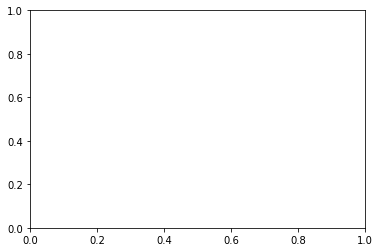

In [507]:
# --- draw elbow plot
##### create an elbow plot for your numbers of clusters in previous step
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [508]:
'''
# ------ RUN CLUSTERING -----
# --- set parameters
n_clusters = 3
init_point_selection_method = 'k-means++'

# --- select data
cols_for_clustering = ['male_False','male_True'] ##### specify list of attributes on which to base clusters
df_cluster = df.loc[:, cols_for_clustering]
# --- split to test and train
df_cluster_train, df_cluster_test, _, _, = train_test_split(df_cluster, [1]*df_cluster.shape[0], test_size=0.33)   # ignoring y values for unsupervised

'''

"\n# ------ RUN CLUSTERING -----\n# --- set parameters\nn_clusters = 3\ninit_point_selection_method = 'k-means++'\n\n# --- select data\ncols_for_clustering = ['male_False','male_True'] ##### specify list of attributes on which to base clusters\ndf_cluster = df.loc[:, cols_for_clustering]\n# --- split to test and train\ndf_cluster_train, df_cluster_test, _, _, = train_test_split(df_cluster, [1]*df_cluster.shape[0], test_size=0.33)   # ignoring y values for unsupervised\n\n"

## 3

In [121]:
# --- output tagged data for examination ----
genre_col_names = ['genre_comedy','genre_drama', 
                                'genre_international', 'genre_other','genre_regional']
df_cluster['preferred_genre'] = None
for t_col in genre_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'preferred_genre'] = t_col.split('_')[1]

    
male_col_names = ['male_False','male_True']
df_cluster['male_TF'] = None
for t_col in male_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'male_TF'] = t_col.split('_')[1]
    
    
attri_tech_col_names = ['attri_tech_affiliate','attri_tech_appstore','attri_tech_bing','attri_tech_bing_organic',
          'attri_tech_brand sem intent bing']
df_cluster['attribution_technical'] = None
for t_col in attri_tech_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'attribution_technical'] = t_col.split('_')[2] ####


In [129]:
#df_cluster['store'] = df_cluster['store'].astype(int)
df_cluster.to_csv('clustering_output.csv')
print(df_cluster.head())

    age  payment_period  male_False  male_True  genre_comedy  genre_drama  \
1  70.0               1           1          0             1            0   
2  25.0               0           0          1             0            0   
3  30.0               0           1          0             0            1   
4  28.0               2           1          0             1            0   
5  70.0               1           1          0             1            0   

   genre_international  genre_other  genre_regional  attri_tech_affiliate  \
1                    0            0               0                     0   
2                    0            0               1                     0   
3                    0            0               0                     0   
4                    0            0               0                     0   
5                    0            0               0                     0   

   attri_tech_appstore  attri_tech_bing  attri_tech_bing_organic  \
1     

,age,payment_period,male_False,male_True,genre_comedy,genre_drama,genre_international,genre_other,genre_regional,attri_tech_affiliate,attri_tech_appstore,attri_tech_bing,attri_tech_bing_organic,attri_tech_brand sem intent bing,predict_cluster_kmeans,store,preferred_genre,male_TF,attribution_technical
1,70.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,None,comedy,False,None
2,25.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,None,regional,True,None
3,30.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,None,drama,False,None
4,28.0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,None,comedy,False,None
5,70.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,None,comedy,False,bing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,61.0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,None,comedy,False,affiliate
227623,38.0,1,1,0,1,0,0,0,0,0,0,0,0,0,2,None,comedy,False,None
227624,49.0,1,1,0,1,0,0,0,0,0,0,0,0,0,2,None,comedy,False,None
227625,45.0,1,1,0,1,0,0,0,0,0,0,0,0,0,2,None,comedy,False,None


 # Attribution and Allocation

In [427]:
'''
# ----- Set parameters -----
touch_col_prepend = 'touch'
direct_label = 'direct'
first_weight = 0.4
last_weight = 0.4
cred_col_post_pend = '_credit'
select_model_types = ['last_touch_point', 'first_touch_point', 'last_nondirect_touch_point', 'linear', 'position']    # options are ['last_touch_point', 'first_touch_point', 'last_nondirect_touch_point', 'linear', 'position']
write_to_file = True
'''

"\n# ----- Set parameters -----\ntouch_col_prepend = 'touch'\ndirect_label = 'direct'\nfirst_weight = 0.4\nlast_weight = 0.4\ncred_col_post_pend = '_credit'\nselect_model_types = ['last_touch_point', 'first_touch_point', 'last_nondirect_touch_point', 'linear', 'position']    # options are ['last_touch_point', 'first_touch_point', 'last_nondirect_touch_point', 'linear', 'position']\nwrite_to_file = True\n"

In [440]:
chan_sp= pd.read_csv('channel_spend_undergraduate.csv')
chan_sp

,tier,spend
0,tier1,"{'bing': 300, 'display': 12, 'facebook': 9000,..."
1,tier2,"{'bing': 400, 'display': 13, 'facebook': 10500..."
2,tier3,"{'bing': 900, 'display': 19, 'facebook': 11000..."
3,tier4,"{'bing': 1000, 'display': 20, 'facebook': 1300..."
4,tier5,"{'bing': 1100, 'display': 29, 'facebook': 1400..."
5,tier6,"{'bing': 1300, 'display': 31, 'facebook': 1600..."
6,tier7,"{'bing': 2100, 'display': 94, 'facebook': 1700..."
7,tier8,"{'bing': 3700, 'display': 148, 'facebook': 230..."


In [441]:
chan_sp['spend'][0]

"{'bing': 300, 'display': 12, 'facebook': 9000, 'search': 13000, 'youtube': 90}"

In [442]:
import json
json.loads(chan_sp['spend'][0].replace("'", '"'))

{'bing': 300, 'display': 12, 'facebook': 9000, 'search': 13000, 'youtube': 90}

In [443]:
chan_sp

,tier,spend
0,tier1,"{'bing': 300, 'display': 12, 'facebook': 9000,..."
1,tier2,"{'bing': 400, 'display': 13, 'facebook': 10500..."
2,tier3,"{'bing': 900, 'display': 19, 'facebook': 11000..."
3,tier4,"{'bing': 1000, 'display': 20, 'facebook': 1300..."
4,tier5,"{'bing': 1100, 'display': 29, 'facebook': 1400..."
5,tier6,"{'bing': 1300, 'display': 31, 'facebook': 1600..."
6,tier7,"{'bing': 2100, 'display': 94, 'facebook': 1700..."
7,tier8,"{'bing': 3700, 'display': 148, 'facebook': 230..."


In [444]:
channel_spend

,tier,spend
0,tier1,"{'bing': 300, 'display': 12, 'facebook': 9000,..."
1,tier2,"{'bing': 400, 'display': 13, 'facebook': 10500..."
2,tier3,"{'bing': 900, 'display': 19, 'facebook': 11000..."
3,tier4,"{'bing': 1000, 'display': 20, 'facebook': 1300..."
4,tier5,"{'bing': 1100, 'display': 29, 'facebook': 1400..."
5,tier6,"{'bing': 1300, 'display': 31, 'facebook': 1600..."
6,tier7,"{'bing': 2100, 'display': 94, 'facebook': 1700..."
7,tier8,"{'bing': 3700, 'display': 148, 'facebook': 230..."


In [447]:
chan_sp_dict = {}
#tier_list = ['tier1', 'tier2', 'tier3','tier4','tier5','tier6','tier7','tier8']
for i in range(8):
    chan_sp_dict[i+1] = json.loads(channel_spend['spend'][i].replace("'", '"')) ##
    print(chan_sp_dict[i+1]) ##
# channel_spend_dict
chan_sp = chan_sp_dict

chan_sp

{'bing': 300, 'display': 12, 'facebook': 9000, 'search': 13000, 'youtube': 90}
{'bing': 400, 'display': 13, 'facebook': 10500, 'search': 18500, 'youtube': 100}
{'bing': 900, 'display': 19, 'facebook': 11000, 'search': 19000, 'youtube': 130}
{'bing': 1000, 'display': 20, 'facebook': 13000, 'search': 24000, 'youtube': 180}
{'bing': 1100, 'display': 29, 'facebook': 14000, 'search': 25000, 'youtube': 550}
{'bing': 1300, 'display': 31, 'facebook': 16000, 'search': 38000, 'youtube': 900}
{'bing': 2100, 'display': 94, 'facebook': 17000, 'search': 41000, 'youtube': 2420}
{'bing': 3700, 'display': 148, 'facebook': 23000, 'search': 44000, 'youtube': 4360}


{1: {'bing': 300,
  'display': 12,
  'facebook': 9000,
  'search': 13000,
  'youtube': 90},
 2: {'bing': 400,
  'display': 13,
  'facebook': 10500,
  'search': 18500,
  'youtube': 100},
 3: {'bing': 900,
  'display': 19,
  'facebook': 11000,
  'search': 19000,
  'youtube': 130},
 4: {'bing': 1000,
  'display': 20,
  'facebook': 13000,
  'search': 24000,
  'youtube': 180},
 5: {'bing': 1100,
  'display': 29,
  'facebook': 14000,
  'search': 25000,
  'youtube': 550},
 6: {'bing': 1300,
  'display': 31,
  'facebook': 16000,
  'search': 38000,
  'youtube': 900},
 7: {'bing': 2100,
  'display': 94,
  'facebook': 17000,
  'search': 41000,
  'youtube': 2420},
 8: {'bing': 3700,
  'display': 148,
  'facebook': 23000,
  'search': 44000,
  'youtube': 4360}}

In [448]:
type(chan_sp)

dict

In [449]:
AA = pd.read_csv('Attribution_and_Allocation_subid_tier_match.csv')

In [450]:
AA = AA[(AA['convert_TF']==True)]

In [451]:
AA

,subid,attribution_technical,attribution_survey,convert_TF,Tier
0,21724479,facebook,facebook,True,3
2,29726122,bing,search,True,8
3,24930568,facebook,facebook,True,5
5,21361112,search,search,True,6
7,27648682,search,search,True,4
...,...,...,...,...,...
97099,26509361,facebook,facebook,True,2
97104,22117405,youtube,facebook,True,7
97106,21434712,facebook,facebook_organic,True,8
97107,24799085,facebook,facebook,True,6


In [452]:
AA['Tier'].unique()

array([3, 8, 5, 6, 4, 7, 2, 1])

In [453]:
tech = {} 
#{comp: 0 for comp in df['attribution_technical'].unique()}
for comp in AA1['attribution_technical'].unique():
    tech[comp] = [[] for i in range(AA1['Tier'].nunique())]



In [454]:
tech

{'facebook': [[], [], [], [], [], [], [], []],
 'bing': [[], [], [], [], [], [], [], []],
 'search': [[], [], [], [], [], [], [], []],
 'youtube': [[], [], [], [], [], [], [], []],
 'display': [[], [], [], [], [], [], [], []]}

In [455]:
survey = {comp: [[] for i in range(AA['Tier'].nunique())] for comp in AA['attribution_technical'].unique()}
survey.pop('display')
survey.pop('bing')



[[], [], [], [], [], [], [], []]

In [456]:
Tier

array([1, 2, 3, 4, 5, 6, 7, 8])

In [457]:
Tier = AA['Tier'].unique()
Tier.sort()
for i in tier:
    temp = AA.loc[AA['Tier']==i,:]
    for j in range(len(temp['attribution_technical'].value_counts())):
        tech[temp['attribution_technical'].unique()[j]][int(i-1)] = temp['attribution_technical'].value_counts()[j]
tech    

{'facebook': [2058, 3754, 4103, 1684, 4902, 2701, 189, 2959],
 'bing': [13, 25, 28, 51, 53, 60, 159, 8497],
 'search': [457, 1179, 1309, 4857, 1866, 6035, 6311, 326],
 'youtube': [1, 1, 7, 11, 36, 65, 93, 312],
 'display': [7, 8, 30, 33, 65, 56, 2862, 181]}

In [458]:
for i in tier:
    temp = AA.loc[(AA['Tier']==i)&(AA['attribution_survey'].isin(survey.keys())),:]
    for j in range(len(temp['attribution_survey'].value_counts())):
        survey[temp['attribution_survey'].unique()[j]][int(i-1)] = temp['attribution_survey'].value_counts()[j]
survey

{'facebook': [156, 3502, 3594, 427, 4351, 602, 5921, 350],
 'search': [1567, 285, 364, 4572, 432, 5597, 583, 7795],
 'youtube': [13, 21, 25, 41, 63, 84, 207, 696]}

In [461]:

#print(tech)

#print(survey)
df_tech=pd.DataFrame(columns=tech.keys(),index=Tier)

In [462]:

for k in tech:
    
    df_tech[k]=tech[k]


In [463]:
df_tech

,facebook,bing,search,youtube,display
1,2058,13,457,1,7
2,3754,25,1179,1,8
3,4103,28,1309,7,30
4,1684,51,4857,11,33
5,4902,53,1866,36,65
6,2701,60,6035,65,56
7,189,159,6311,93,2862
8,2959,8497,326,312,181


In [464]:

#print(df_tech)
df_survey=pd.DataFrame(columns=survey.keys(),index=Tier)
for j in survey:
    df_survey[j]=survey[j]
df_survey


,facebook,search,youtube
1,156,1567,13
2,3502,285,21
3,3594,364,25
4,427,4572,41
5,4351,432,63
6,602,5597,84
7,5921,583,207
8,350,7795,696


In [465]:
chan_sp

{1: {'bing': 300,
  'display': 12,
  'facebook': 9000,
  'search': 13000,
  'youtube': 90},
 2: {'bing': 400,
  'display': 13,
  'facebook': 10500,
  'search': 18500,
  'youtube': 100},
 3: {'bing': 900,
  'display': 19,
  'facebook': 11000,
  'search': 19000,
  'youtube': 130},
 4: {'bing': 1000,
  'display': 20,
  'facebook': 13000,
  'search': 24000,
  'youtube': 180},
 5: {'bing': 1100,
  'display': 29,
  'facebook': 14000,
  'search': 25000,
  'youtube': 550},
 6: {'bing': 1300,
  'display': 31,
  'facebook': 16000,
  'search': 38000,
  'youtube': 900},
 7: {'bing': 2100,
  'display': 94,
  'facebook': 17000,
  'search': 41000,
  'youtube': 2420},
 8: {'bing': 3700,
  'display': 148,
  'facebook': 23000,
  'search': 44000,
  'youtube': 4360}}

In [466]:
tech.keys()

dict_keys(['facebook', 'bing', 'search', 'youtube', 'display'])

In [467]:
'''
channel_spend=pd.read_csv("channel_spend_undergraduate.csv")

#print(df_channel_spend)

#df_s=pd.DataFrame(columns=tech.keys(),index=tier)
#for c in df_s.columns:
    #spend = []
    #df_tech[k]=tech[k]
#df_tech

import json

chan_spend_dict={}
#tier_list=['tier1','tier2','tier3','tier4','tier5','tier6','tier7','tier8']
for i in range(8):
  chan_spend_dict[i+1]= json.loads(channel_spend['spend'][i].replace("'",'"'))
  print(chan_spend_dict[i+1])
#assign the value of chan_spand_dict to channel_spend
channel_spend=chan_spend_dict
#print(channel_spend)
'''


df_spend=pd.DataFrame(columns=tech.keys(),index=Tier)
df_spend


,facebook,bing,search,youtube,display
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN


In [468]:
chan_sp

{1: {'bing': 300,
  'display': 12,
  'facebook': 9000,
  'search': 13000,
  'youtube': 90},
 2: {'bing': 400,
  'display': 13,
  'facebook': 10500,
  'search': 18500,
  'youtube': 100},
 3: {'bing': 900,
  'display': 19,
  'facebook': 11000,
  'search': 19000,
  'youtube': 130},
 4: {'bing': 1000,
  'display': 20,
  'facebook': 13000,
  'search': 24000,
  'youtube': 180},
 5: {'bing': 1100,
  'display': 29,
  'facebook': 14000,
  'search': 25000,
  'youtube': 550},
 6: {'bing': 1300,
  'display': 31,
  'facebook': 16000,
  'search': 38000,
  'youtube': 900},
 7: {'bing': 2100,
  'display': 94,
  'facebook': 17000,
  'search': 41000,
  'youtube': 2420},
 8: {'bing': 3700,
  'display': 148,
  'facebook': 23000,
  'search': 44000,
  'youtube': 4360}}

In [492]:
for c in df_spend.columns:
    l = [] #i = tier, c = channel
    for i in Tier:
        l.append(chan_sp[i][c])
        
    df_spend[c] = l

df_spend.to_csv('spend_')
df_spend

,facebook,bing,search,youtube,display
1,9000,300,13000,90,12
2,10500,400,18500,100,13
3,11000,900,19000,130,19
4,13000,1000,24000,180,20
5,14000,1100,25000,550,29
6,16000,1300,38000,900,31
7,17000,2100,41000,2420,94
8,23000,3700,44000,4360,148


In [491]:
df_CAC_tech=pd.DataFrame(columns=tech.keys(),index=tier)

for z in df_spend.columns:
    for i in Tier:
        if i == 1:
            df_CAC_tech[z][i] = df_spend[z][i] / df_tech[z][i]
        else:
            df_CAC_tech[z][i] = (df_spend[z][i] - df_spend[z][i-1]) / df_tech[z][i]
    
        
df_CAC_tech.to_csv('CAC_tech')
df_CAC_tech

,facebook,bing,search,youtube,display
1.0,4.37318,23.0769,28.4464,90,1.71429
2.0,0.399574,4,4.66497,10,0.125
3.0,0.121862,17.8571,0.381971,4.28571,0.2
4.0,1.18765,1.96078,1.02944,4.54545,0.030303
5.0,0.203998,1.88679,0.535906,10.2778,0.138462
6.0,0.740466,3.33333,2.1541,5.38462,0.0357143
7.0,5.29101,5.03145,0.47536,16.3441,0.0220126
8.0,2.02771,0.188302,9.20245,6.21795,0.298343
NaN,NaN,NaN,NaN,NaN,NaN


In [490]:


df_CAC_survey=pd.DataFrame(columns=survey.keys(),index=tier)

for z in [z for z in df_spend.columns if z in survey.keys()]:
    for i in Tier:
        if i == 1:
            df_CAC_survey[z][i] = df_spend[z][i] / df_survey[z][i]
        else:
            df_CAC_survey[z][i] = (df_spend[z][i] - df_spend[z][i-1]) / df_survey[z][i]

df_CAC_survey.to_csv('CAC_survey')
df_CAC_survey


,facebook,search,youtube
1.0,57.6923,8.29611,6.92308
2.0,0.428327,19.2982,0.47619
3.0,0.139121,1.37363,1.2
4.0,4.68384,1.09361,1.21951
5.0,0.229832,2.31481,5.87302
6.0,3.32226,2.32267,4.16667
7.0,0.16889,5.1458,7.343
8.0,17.1429,0.384862,2.78736
NaN,NaN,NaN,NaN


In [488]:

import os

In [489]:
os.getcwd()

'/Users/glorialiu/DMA'